# Basic Linear Regression in Python

This is a Jupyter notebook. It allows you to run Python code, and can display the results back to you.

The code in a notebook is divided into cells - code in each cell can be run independently, by clicking in the cell and then the 'Run' button in the menu bar above, or by typing _shift-enter_.

In [1]:
# In this cell we import the modules we want to use later on.
import pandas     # To work with tables
import numpy      # For maths
import seaborn    # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt

cufflinks.go_offline()

## Importing data

Data can be easily imported from spreadsheets or databases.

The `pandas` module provides common functions for working with (_n_-dimensional) tabular data in Python.

In [2]:
# Import a dataset of advertising spends
advert = pandas.read_csv('Advertising.csv', index_col=0)

# Display the first five rows of the data
advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'radio']
X = advert[predictors]
y = advert['sales']

# Initialise and fit model
lm = LinearRegression()
model_TV_Radio = lm.fit(X, y)

In [16]:
# We can examine the model coefficients
print(f'alpha = {model_TV_Radio.intercept_}')
print(f'betas = {model_TV_Radio.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


## Model validation

`sklearn` has many functions to simplfy the validation of models, such as generating training/test splits.

In [11]:
from sklearn.model_selection import train_test_split

# Divide the data 80-20 into a training and test set
train, test = train_test_split(advert, test_size=0.2)

In [12]:
# Build linear regression model on the training data using all predictors
predictors = ['TV', 'radio', 'newspaper']
X = train[predictors]
y = train['sales']

# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y)

In [13]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictors])

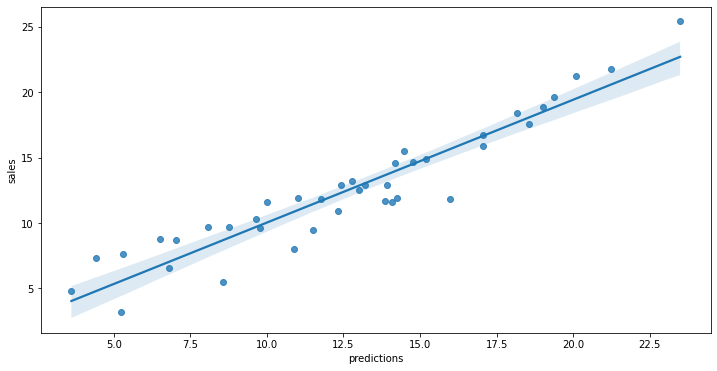

In [14]:
plt.figure(figsize=(12, 6))
ax = seaborn.regplot(y='sales', x='predictions', data=test)

`sklearn` has built in functions to generate quality metrics such as R²

In [15]:
r_squared = model_All.score(test[predictors], test["sales"])
print(f'Model R²: {r_squared:.2f}')

Model R²: 0.89
